#  **Практическое занятие №1. Введение в машинное обучение.**

## Знакомство с библиотекой **matplotlib**

matplotlib - библиотека на python для визуализации данных.

https://matplotlib.org/stable/tutorials/introductory/pyplot.html


In [1]:
from matplotlib import pyplot as plt


# включаем интерактивную поддержку matplotlib для jupyter notebook.
%matplotlib inline 

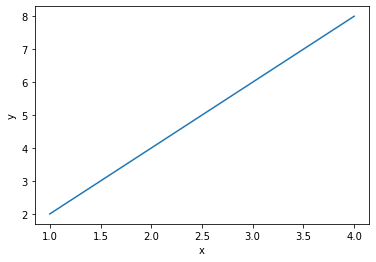

In [4]:
# нарисуем прямую с координатами (1, 2), (2, 4), (3, 6), (4, 8)
plt.plot([1, 2, 3, 4], [2, 4, 6, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

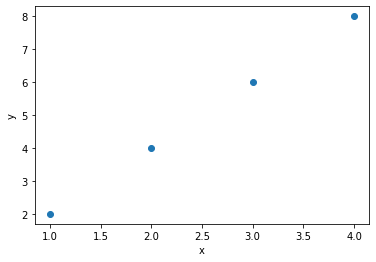

In [5]:
# нарисуем только точки с координатами
plt.scatter([1, 2, 3, 4], [2, 4, 6, 8])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

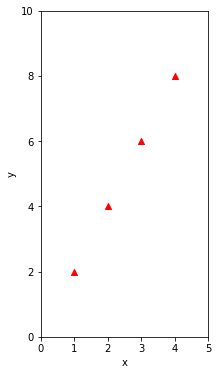

In [7]:
# немного кастомизируем наш график
plt.figure(figsize=(3, 6))

plt.scatter([1, 2, 3, 4], [2, 4, 6, 8], c='r', marker='^')

plt.xlim(0, 5)
plt.ylim(0, 10)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Задача №1. Нарисуйте $y = sin(x)$, где $x \in [-0.5, 5)$ c шагом $0.1$ по $x$, таже нарисуйте красные точки на этом же графике с шагом 0.5.

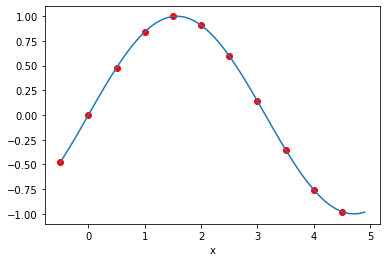

In [11]:
# Your code here
import numpy as np

x1 = np.arange(-0.5, 5, 0.1)
y1 = np.sin(x1)
plt.plot(x1, y1)

x2 = np.arange(-0.5, 5, 0.5)
y2 = np.sin(x2)
plt.scatter(x2, y2, c='r')

plt.xlabel('x')

plt.show()


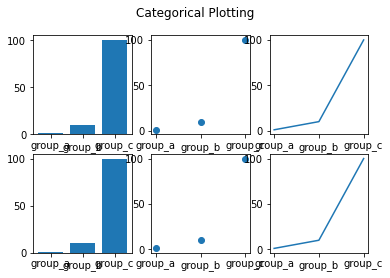

In [16]:
# также во многих функциях можно использовать категориальные значения
# ещё можно делать таблички из графиков

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

#plt.figure(figsize=(9, 3))

plt.subplot(231)
plt.bar(names, values)

plt.subplot(232)
plt.scatter(names, values)

plt.subplot(233)
plt.plot(names, values)

plt.subplot(234)
plt.bar(names, values)
plt.subplot(235)
plt.scatter(names, values)
plt.subplot(236)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [ ]:
# можно рисовать ещё множество типов графиков, предлагаю попробовать сделать круговую диаграмму для набора данных 



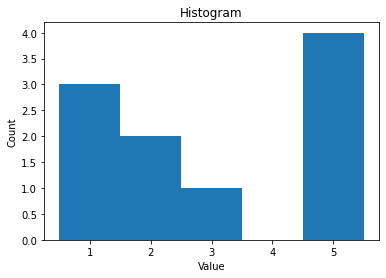

In [17]:
# очень полезно уметь рисовать гистограммы, так как это простой способ посмотреть на свои данные
values = [1, 1, 1, 2, 2, 3, 5, 5, 5, 5]

# the histogram of the data
n, bins, patches = plt.hist(values, bins=5, range=(0.5, 5.5)) # [0.5-1.5), [1.5-2.5) .. 

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

In [18]:
n

array([3., 2., 1., 0., 4.])

In [19]:
bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

In [20]:
patches

<BarContainer object of 5 artists>

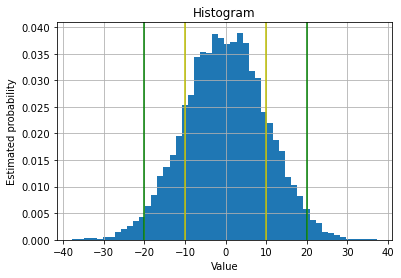

In [24]:
# нарисуем теперь гистограмму для набора случайных величин
import numpy as np

mu = 0
sigma = 10
values = np.random.normal(mu, sigma, 10000)

# the histogram of the data
n, bins, patches = plt.hist(values, 50, density=True)

# интересный факт: для нормального распределения примерно 
# 95% выборки будут лежать между mu - 2*sigma и mu + 2*sigma
plt.axvline(x=(mu + 2 * sigma), c='g')
plt.axvline(x=(mu - 2 * sigma), c='g')

# интересный факт: для нормального распределения примерно 
# 68% выборки будут лежать между mu - sigma и mu + sigma
plt.axvline(x=(mu + sigma), c='y')
plt.axvline(x=(mu - sigma), c='y')

plt.xlabel('Value')
plt.ylabel('Estimated probability')
plt.title('Histogram')
plt.grid(True)
plt.show()

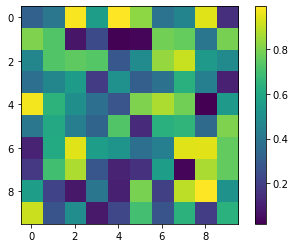

In [25]:
# также matplotlib умеет рисовать картинки
# нарисуем картинку ссо случайным значением каждого пикселя

#values = [[], []]

plt.imshow(np.random.random((10, 10)))
plt.colorbar()

plt.show()

Задача №2. Нарисуйте картинку 100x100, в которой будет галочка или крестик на однотонном фоне

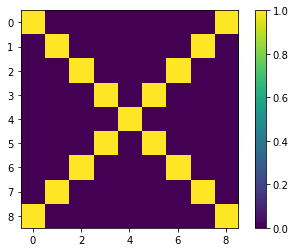

In [32]:
# Your code here

f = np.eye(9)
s = np.eye(9)[::-1]

t = np.asarray((f + s) > 0, dtype=int)

t
plt.imshow(t)
plt.colorbar()

plt.show()

## Библитека **sklearn**. Примеры "игрушечных" синтетических датасетов и датасетов на реальных данных.

https://scikit-learn.org/stable/modules/classes.html#samples-generator 

[ True  True False ... False  True  True]
[False False  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


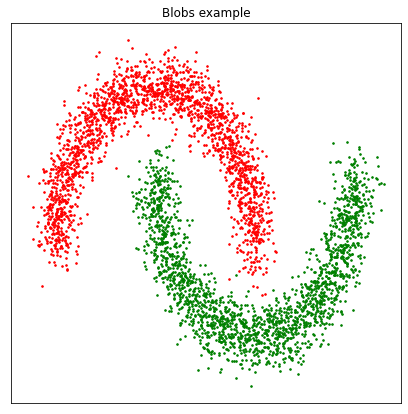

In [41]:
from sklearn import datasets

# Пример синтетического датасета для классификации
# Сгенерируем датасет с двумя фичами (a, b), где каждый пример принадлежит одному из четырёх классов
n_samples = 4000
n_components = 4

# X, y_true = datasets.make_blobs(
#     n_samples=n_samples, centers=n_components, cluster_std=0.9, random_state=0
# )

# Ещё несколько примеров для двух классов

# X, y_true = datasets.make_circles(
#     n_samples=n_samples, factor=0.5, noise=0.05
# )
X, y_true = datasets.make_moons(
    n_samples=n_samples, noise=0.1
)

plt.figure(figsize=(7, 7))
colors = ["r", "g", "b", "m"]

for k, col in enumerate(colors):
    cluster_data = (y_true == k)
    print(cluster_data)
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.title("Blobs example")
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
y_true

array([2, 3, 2, ..., 1, 2, 1])

In [35]:
X

array([[-1.50824765e+00,  2.52510964e+00],
       [-2.28628272e+00,  7.46823809e+00],
       [-4.68814302e-01,  2.10725384e+00],
       ...,
       [ 2.12055668e+00,  4.17134782e-04],
       [-1.12993421e+00,  2.38265914e+00],
       [ 3.08948529e+00,  1.32547340e+00]])

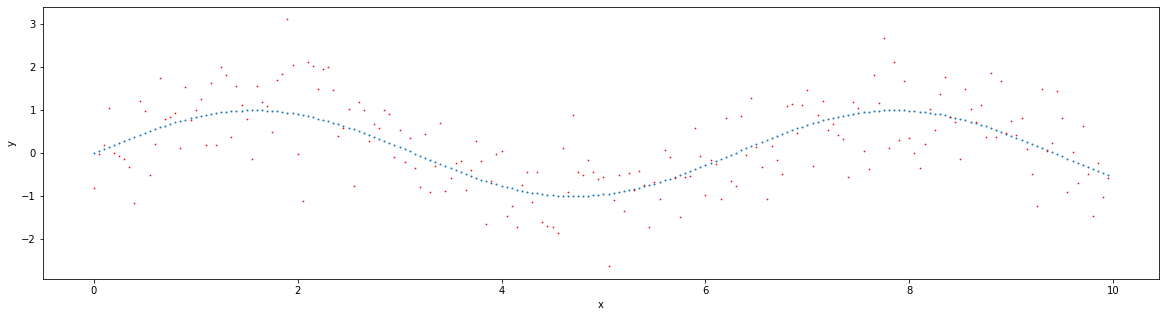

In [52]:
# Давайте сгенерируем пример для регрессии
X = np.arange(0, 10, 0.05) #0,0.05, 0.10, .... #200 штук
y_true = np.sin(X)


# Сгенерируем шум
mu = 0
sigma = 0.7
noise = np.random.normal(mu, sigma, len(y_true))
y_true_noisy = y_true + noise

plt.figure(figsize=(20, 5))
plt.scatter(X, y_true, s=1)
plt.scatter(X, y_true_noisy, s=0.5, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Задача №3. Придумайте свои синтетические примеры датасетов для задачи регрессии и классификации, запрограммируйте и визуализируйте их.

## **Метод k ближайших соседей (kNN)**, реализация в библиотеке sklearn. 

https://ru.wikipedia.org/wiki/Метод_k-ближайших_соседей



В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди $k$ соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по $k$ ближайшим к нему объектам, значения которых уже известны.

**Пример**: зелёный круг нужно классифицировать как синий квадрат (класс 1) или как красный треугольник (класс 2). Если k = 3, то он классифицируется как 2-й класс, потому что внутри меньшего круга 2 треугольника и только 1 квадрат. Если k = 5, то он будет классифицирован как 1-й класс (3 квадрата против 2 треугольников внутри большего круга)

![example](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

<sub>Автор: Antti Ajanki AnAj - собственная работа, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2170282</sub>

In [54]:
from sklearn.neighbors import KNeighborsClassifier

#help(KNeighborsClassifier)

### Тестирование метода на синтетических данных.


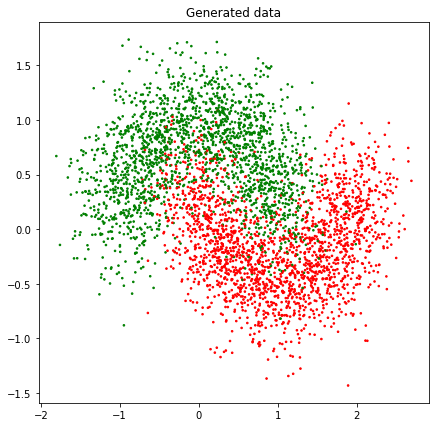

In [56]:
# Генерируем данные 

n_samples = 4000

X, y_true = datasets.make_moons(
    n_samples=n_samples, noise=0.3
)

plt.figure(figsize=(7, 7))

y_colors = ["r" if y else "g" for y in y_true]
plt.scatter(X[:, 0], X[:, 1], c=y_colors, marker=".", s=10)

plt.title("Generated data")
plt.show()

In [58]:
y_true

array([1, 1, 0, ..., 1, 0, 1])

In [59]:
from sklearn.model_selection import train_test_split

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=test_size)

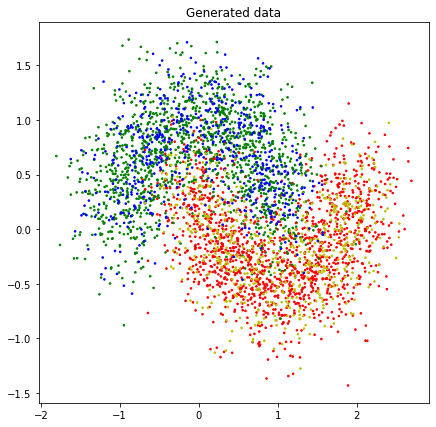

In [71]:
plt.figure(figsize=(7, 7))

y_colors = ["r" if y else "g" for y in y_train]
y_colors_test = ["y" if y else "b" for y in y_test]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_colors, marker=".", s=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_colors_test, marker=".", s=10)

plt.title("Generated data")
plt.show()

In [60]:
algorithm = KNeighborsClassifier(n_neighbors=3)
algorithm.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_predicted = algorithm.predict(X_test)

In [62]:
y_predicted

array([1, 0, 1, ..., 1, 1, 0])

### Реализуем метрики ререссии самостоятельно и сравниваем с готовыми функциями в библиотеке sklearn.

### Вспоминаем,  какие есть метрики классификации

![](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg?download)

<sub>By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283</sub>




\begin{array}{|c|c|} \hline
 & y = 1 & y = 0 \\ \hline
\hat{y} = 1 & True Positive (TP) & False Positive (FP) \\ \hline
\hat{y} = 0 & False Negative (FN) & True Negative (TN) \\\hline
\end{array}

* **Аккуратнсть**

  $Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

* **Точность**

  $Precision=\frac{TP}{TP+FP}$

* **Полнота** 

  $Recall=\frac{TP}{TP+FN}$

* **F-мера**

  $F\_score = \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}}$

In [75]:
import sklearn
def accuracy(y_true, y_pred):
  # Почему это эквивалентно тому, как мы определили accuracy выше?
  return np.sum(y_true == y_pred) / len(y_true)

assert accuracy(y_test, y_predicted) == sklearn.metrics.accuracy_score(y_test, y_predicted)
print('Accuracy score is {:.2f}'.format(sklearn.metrics.accuracy_score(y_test, y_predicted)))

Accuracy score is 0.90


In [77]:
def precision(y_true, y_pred):
    tp = np.sum(np.logical_and(y_pred == y_true, y_true == 1))
    return tp / np.sum(y_pred)

assert precision(y_test, y_predicted) == sklearn.metrics.precision_score(y_test, y_predicted)
print('Precision score is {:.2f}'.format(sklearn.metrics.precision_score(y_test, y_predicted)))

Precision score is 0.90


In [79]:
def recall(y_true, y_pred):
    tp = np.sum(np.logical_and(y_pred == y_true, y_true == 1))
    return tp / np.sum(y_true)

assert recall(y_test, y_predicted) == sklearn.metrics.recall_score(y_test, y_predicted)
print('Recall score is {:.2f}'.format(sklearn.metrics.recall_score(y_test, y_predicted)))

Recall score is 0.90


In [87]:
def f_score(y_true, y_pred):
    return 1.0 / (1 / precision(y_true, y_pred) + 1 / recall(y_true, y_pred))

#assert f_score(y_test, y_predicted) == sklearn.metrics.f1_score(y_test, y_predicted)
print('F-score sccore is {:.10f}'.format(sklearn.metrics.f1_score(y_test, y_predicted)))

F-score sccore is 0.9033333333


In [84]:
sklearn.metrics.f1_score(y_test, y_predicted)

0.9033333333333333

Задача №4. Реализуйте метрики ререссии самостоятельно и сравните с готовыми функциями в библиотеке sklearn. Формулы можно взять в лекции.

## Датасет Ирисы Фишера, тестирование метода kNN на нём.

https://ru.wikipedia.org/wiki/Ирисы_Фишера

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

*   Длина наружной доли околоцветника (англ. sepal length);
*   Ширина наружной доли околоцветника (англ. sepal width);
*   Длина внутренней доли околоцветника (англ. petal length);
*   Ширина внутренней доли околоцветника (англ. petal width).

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [88]:
data = sklearn.datasets.load_iris()
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [185]:
%pip install seaborn

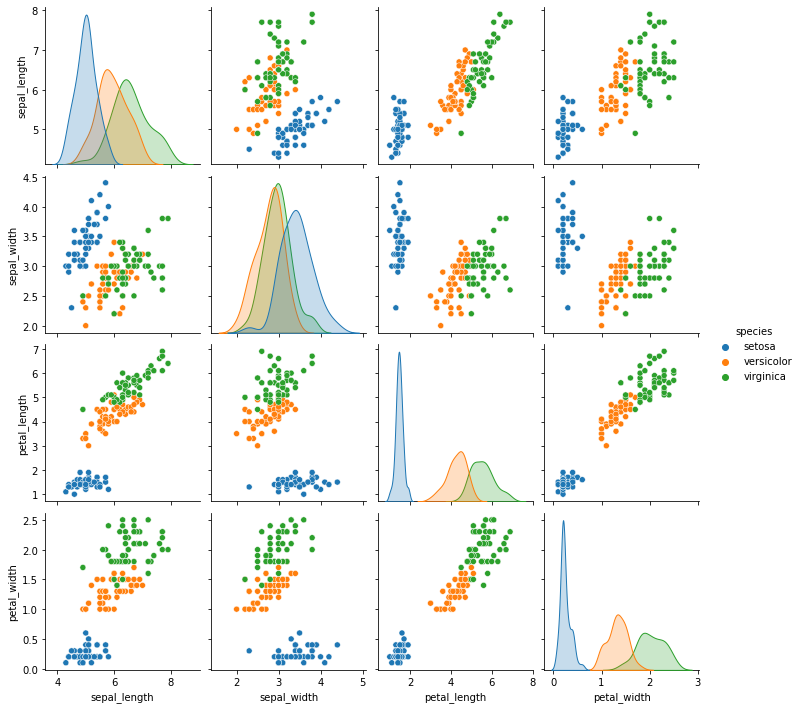

In [91]:
# это можно нарисовать используя только matplotlib, но мы для простоты воспользуемся seaborn 
# (https://seaborn.pydata.org/generated/seaborn.pairplot.html)

import seaborn

iris_df = seaborn.load_dataset("iris")
seaborn.pairplot(iris_df, hue="species")


In [96]:
# Предлагаю теперь пробовать воспользоваться kNN для классификации ирисов

X = data.data
y = data.target

test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size)

algorithm = KNeighborsClassifier(n_neighbors=3)
algorithm.fit(X_train, y_train)
y_predicted = algorithm.predict(X_test)

In [97]:
y_predicted

array([1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 0, 2, 1, 2])

In [100]:
print(sklearn.metrics.classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        25
           2       0.92      0.92      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

